In [1]:
!pip install opencv-python
!pip install tensorflow
!pip install imblearn

In [2]:
import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt
import tensorflow as tf

### set the labels

In [3]:
emotions = ["angry","fear","happy","neutral","sad","surprise"]

#### path for training data

In [4]:
dataset_dir = "./train"

### visualizing the data

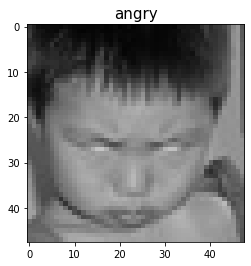

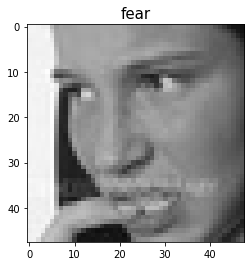

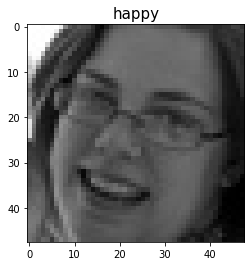

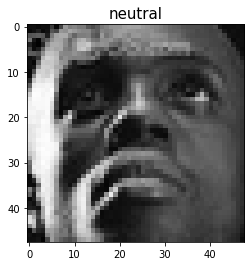

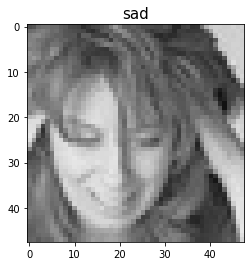

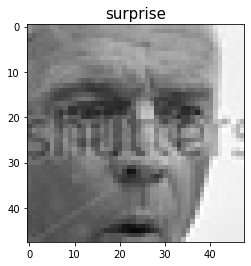

In [5]:
for emotion in emotions:
    path = os.path.join(dataset_dir,emotion)
    for img in os.listdir(path):
        img_array = cv.imread(os.path.join(path,img))
        plt.imshow(cv.cvtColor(img_array,cv.COLOR_BGR2RGB))
        plt.title(emotion, fontsize=15)
        plt.show()
        break        

## read through all the images and converting them to array

In [6]:
training_data = []

def create_training_data():
    for emotion in emotions:
        path = os.path.join(dataset_dir,emotion)
        class_label = emotions.index(emotion)
        for img in os.listdir(path):
            img_array = cv.imread(os.path.join(path,img))
            training_data.append([img_array,class_label])
            

In [7]:
create_training_data()

In [8]:
print(len(training_data))

28273


In [9]:
import random
random.shuffle(training_data)

### Creating the features and labels

In [10]:
X = [] ##feature
y = [] ##labels

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1,48,48,3)

### Preprocessing

In [11]:
X.shape

(28273, 48, 48, 3)

In [12]:
X = X.astype(np.uint8)
X.dtype

dtype('uint8')

In [13]:
len(y)

28273

In [14]:
y = np.array(y)

In [15]:
y = y.astype(np.uint8)
y.dtype

dtype('uint8')

In [16]:
y[:5]

array([3, 4, 1, 0, 3], dtype=uint8)

In [17]:
X_rescaled = X/255
X_rescaled[:5]

array([[[[0.51764706, 0.51764706, 0.51764706],
         [0.48627451, 0.48627451, 0.48627451],
         [0.46666667, 0.46666667, 0.46666667],
         ...,
         [0.21568627, 0.21568627, 0.21568627],
         [0.20392157, 0.20392157, 0.20392157],
         [0.24705882, 0.24705882, 0.24705882]],

        [[0.54509804, 0.54509804, 0.54509804],
         [0.54901961, 0.54901961, 0.54901961],
         [0.54509804, 0.54509804, 0.54509804],
         ...,
         [0.23137255, 0.23137255, 0.23137255],
         [0.19215686, 0.19215686, 0.19215686],
         [0.19607843, 0.19607843, 0.19607843]],

        [[0.52941176, 0.52941176, 0.52941176],
         [0.53333333, 0.53333333, 0.53333333],
         [0.5254902 , 0.5254902 , 0.5254902 ],
         ...,
         [0.23137255, 0.23137255, 0.23137255],
         [0.18039216, 0.18039216, 0.18039216],
         [0.15686275, 0.15686275, 0.15686275]],

        ...,

        [[0.74117647, 0.74117647, 0.74117647],
         [0.76078431, 0.76078431, 0.76078431]

## Model Creation and Training

In [18]:
from tensorflow import keras
data_augmentation = keras.Sequential(
    [
        keras.layers.experimental.preprocessing.RandomRotation(0.1),
        keras.layers.experimental.preprocessing.RandomZoom(0.1),
        keras.layers.experimental.preprocessing.RandomContrast(factor = 0.2),
    ]
)

In [19]:
model = keras.Sequential([
    data_augmentation,
    keras.layers.Conv2D(32, (3,3),activation='relu', padding='same',input_shape=(48, 48,3)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(32, (5,5),activation='relu',padding='same'),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(32, (3,3),activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),

    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(len(emotions), activation='softmax')
])

model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics='accuracy')

model.fit(X_rescaled,y,epochs=50)

Epoch 1/50
884/884 [==============================] - 14s 12ms/step - loss: 1.7288 - accuracy: 0.2682
Epoch 2/50
884/884 [==============================] - 11s 12ms/step - loss: 1.6399 - accuracy: 0.3229
Epoch 3/50
884/884 [==============================] - 11s 12ms/step - loss: 1.5491 - accuracy: 0.3712
Epoch 4/50
884/884 [==============================] - 11s 12ms/step - loss: 1.4695 - accuracy: 0.4082
Epoch 5/50
884/884 [==============================] - 11s 12ms/step - loss: 1.4135 - accuracy: 0.4355
Epoch 6/50
884/884 [==============================] - 11s 12ms/step - loss: 1.3726 - accuracy: 0.4544
Epoch 7/50
884/884 [==============================] - 11s 12ms/step - loss: 1.3428 - accuracy: 0.4700
Epoch 8/50
884/884 [==============================] - 11s 12ms/step - loss: 1.3173 - accuracy: 0.4803
Epoch 9/50
884/884 [==============================] - 11s 12ms/step - loss: 1.2947 - accuracy: 0.4881
Epoch 10/50
884/884 [==============================] - 11s 12ms/step - loss: 1.276

## Creating Test Dataset

In [20]:
dataset_test_dir = "./test"

In [21]:
test_data = []

def create_test_data():
    for emotion in emotions:
        path = os.path.join(dataset_test_dir,emotion)
        class_label = emotions.index(emotion)
        for img in os.listdir(path):
            img_array = cv.imread(os.path.join(path,img))
            test_data.append([img_array,class_label])

In [22]:
create_test_data()

In [23]:
print(len(test_data))

7067


In [24]:
random.shuffle(test_data)

In [25]:
X_test = [] ##feature
y_test = [] ##labels

for features, label in test_data:
    X_test.append(features)
    y_test.append(label)

X_test = np.array(X_test).reshape(-1,48,48,3)

X_test = X_test.astype(np.uint8)
X_test.dtype

dtype('uint8')

In [26]:
y_test = np.array(y_test)
y_test = y_test.astype(np.uint8)
y_test.dtype

dtype('uint8')

In [27]:
X_test_rescaled = X_test/255
X_test_rescaled[:5]

array([[[[0.25882353, 0.25882353, 0.25882353],
         [0.23529412, 0.23529412, 0.23529412],
         [0.27843137, 0.27843137, 0.27843137],
         ...,
         [0.56470588, 0.56470588, 0.56470588],
         [0.32941176, 0.32941176, 0.32941176],
         [0.33333333, 0.33333333, 0.33333333]],

        [[0.24313725, 0.24313725, 0.24313725],
         [0.21960784, 0.21960784, 0.21960784],
         [0.24705882, 0.24705882, 0.24705882],
         ...,
         [0.62352941, 0.62352941, 0.62352941],
         [0.43137255, 0.43137255, 0.43137255],
         [0.27058824, 0.27058824, 0.27058824]],

        [[0.26666667, 0.26666667, 0.26666667],
         [0.27058824, 0.27058824, 0.27058824],
         [0.24705882, 0.24705882, 0.24705882],
         ...,
         [0.44705882, 0.44705882, 0.44705882],
         [0.6       , 0.6       , 0.6       ],
         [0.25490196, 0.25490196, 0.25490196]],

        ...,

        [[0.26666667, 0.26666667, 0.26666667],
         [0.18039216, 0.18039216, 0.18039216]

In [28]:
y_test[:10]

array([2, 4, 3, 4, 5, 1, 1, 1, 0, 5], dtype=uint8)

In [29]:
y_pred = model.predict(X_test_rescaled)

In [30]:
y_pred_final= []
for i in range(len(y_pred)):
    y_pred_final.append(np.argmax(y_pred[i]))

In [31]:
y_pred_final[:10]

[2, 4, 2, 3, 5, 4, 3, 1, 2, 0]

In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [33]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.46      0.44      0.45       958
           1       0.40      0.33      0.36      1024
           2       0.75      0.80      0.77      1774
           3       0.49      0.53      0.51      1233
           4       0.43      0.44      0.43      1247
           5       0.71      0.68      0.69       831

    accuracy                           0.56      7067
   macro avg       0.54      0.54      0.54      7067
weighted avg       0.55      0.56      0.55      7067



Text(69.0, 0.5, 'Truth')

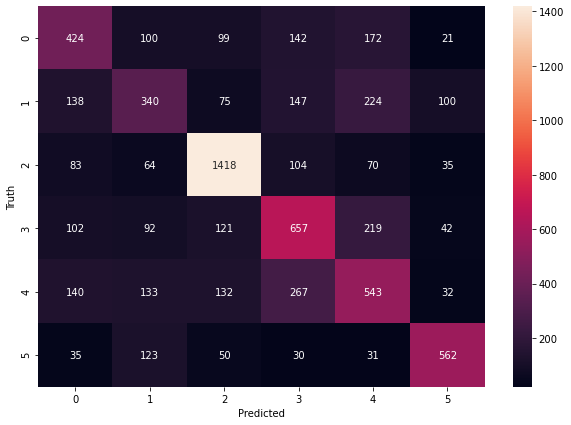

In [34]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_final)

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')